In [1]:
from brian2 import *

# Параметры симуляции
duration = 1000 * ms

# Время для расчетов
time = linspace(0, float(duration), int(duration / defaultclock.dt)) * second

# Группа 1: Изменение частоты (фаза одинаковая для всех нейронов)
frequencies = linspace(2, 20, 101) * Hz  # Частоты от 2 до 20 Гц
constant_phase = 0  # Одинаковая фаза для всех нейронов

# Расчет входного тока для группы 1
I_freq = np.array([np.sin(2 * pi * freq * time + constant_phase) for freq in frequencies])

# Использование TimedArray для группы 1
I_freq_array = TimedArray(I_freq.T, dt=defaultclock.dt)

# Группа нейронов 1 (управляемая частотой)
G_freq = NeuronGroup(101, '''dv/dt = (-v + I_freq_array(t, i))/(10*ms) : 1''',
                     threshold='v > 0.5', reset='v = 0', method='euler')

# Группа 2: Изменение фазы (частота одинаковая для всех нейронов)
common_frequency = 10 * Hz  # Одинаковая частота для всех нейронов
phases = linspace(0, 2 * pi, 361)  # Фазы от 0 до 2π

# Расчет входного тока для группы 2
I_phase = np.array([np.sin(2 * pi * common_frequency * time + phase) for phase in phases])

# Использование TimedArray для группы 2
I_phase_array = TimedArray(I_phase.T, dt=defaultclock.dt)

# Группа нейронов 2 (управляемая фазой)
G_phase = NeuronGroup(361, '''dv/dt = (-v + I_phase_array(t, i))/(10*ms) : 1''',
                      threshold='v > 0.5', reset='v = 0', method='euler')

# Мониторы для группы частот
spike_monitor_freq = SpikeMonitor(G_freq)
voltage_monitor_freq = StateMonitor(G_freq, 'v', record=True)

# Мониторы для группы фаз
spike_monitor_phase = SpikeMonitor(G_phase)
voltage_monitor_phase = StateMonitor(G_phase, 'v', record=True)

# Запуск симуляции
run(duration)

WARNING    Removing unsupported flag '-w' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-O3' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-ffast-math' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-fno-finite-math-only' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Removing unsupported flag '-std=c++11' from compiler flags. [brian2.codegen.cpp_prefs]
WARNING    Cannot use Cython, a test compilation failed: command 'g++' failed: No such file or directory (CompileError)
Certain compiler configurations (e.g. clang in a conda environment on OS X) are known to be problematic. Note that you can switch the compiler by setting the 'CC' and 'CXX' environment variables. For example, you may want to try 'CC=gcc' and 'CXX=g++'. [brian2.codegen.runtime.cython_rt.cytho

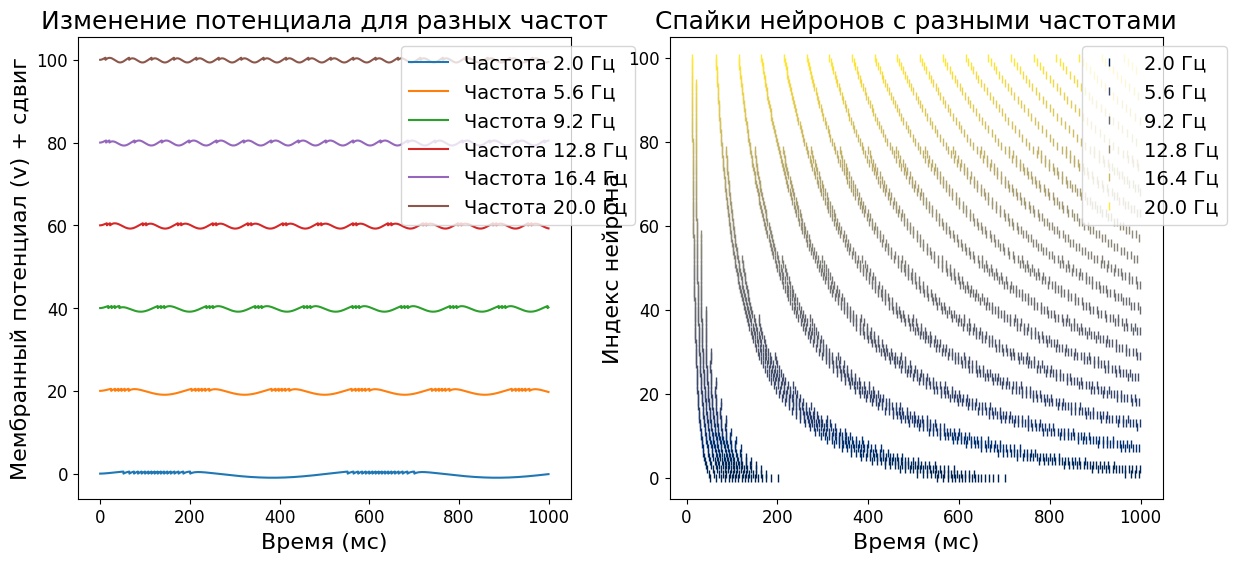

In [2]:
# Настройки шрифтов
plt.rcParams.update({'font.size': 14, 'axes.labelsize': 16, 'axes.titlesize': 18, 'legend.fontsize': 14, 'xtick.labelsize': 12, 'ytick.labelsize': 12})

# --- Фигура 1: Результаты для нейронов с разными частотами ---
plt.figure(figsize=(14, 6))

# График 1: Мембранный потенциал для нейронов с разными частотами (с добавленным сдвигом)
plt.subplot(121)
offset = 1  # Сдвиг для визуального разделения графиков
for i in range(0, 101, 20):  # Выводим потенциалы для каждых 20-го нейрона
    plot(voltage_monitor_freq.t / ms, voltage_monitor_freq.v[i] + i * offset, label=f'Частота {frequencies[i]:.1f} Гц')
plt.xlabel('Время (мс)')
plt.ylabel('Мембранный потенциал (v) + сдвиг')
plt.title('Изменение потенциала для разных частот')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# График 2: Спайки нейронов с разными частотами
plt.subplot(122)
colors_freq = plt.cm.cividis(np.linspace(0, 1, 101))
for i in range(101):
    neuron_spikes = spike_monitor_freq.i == i
    plot(spike_monitor_freq.t[neuron_spikes] / ms, spike_monitor_freq.i[neuron_spikes], '|', color=colors_freq[i], label=f'{frequencies[i]:.1f} Гц' if i % 20 == 0 else "")

plt.xlabel('Время (мс)')
plt.ylabel('Индекс нейрона')
plt.title('Спайки нейронов с разными частотами')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))




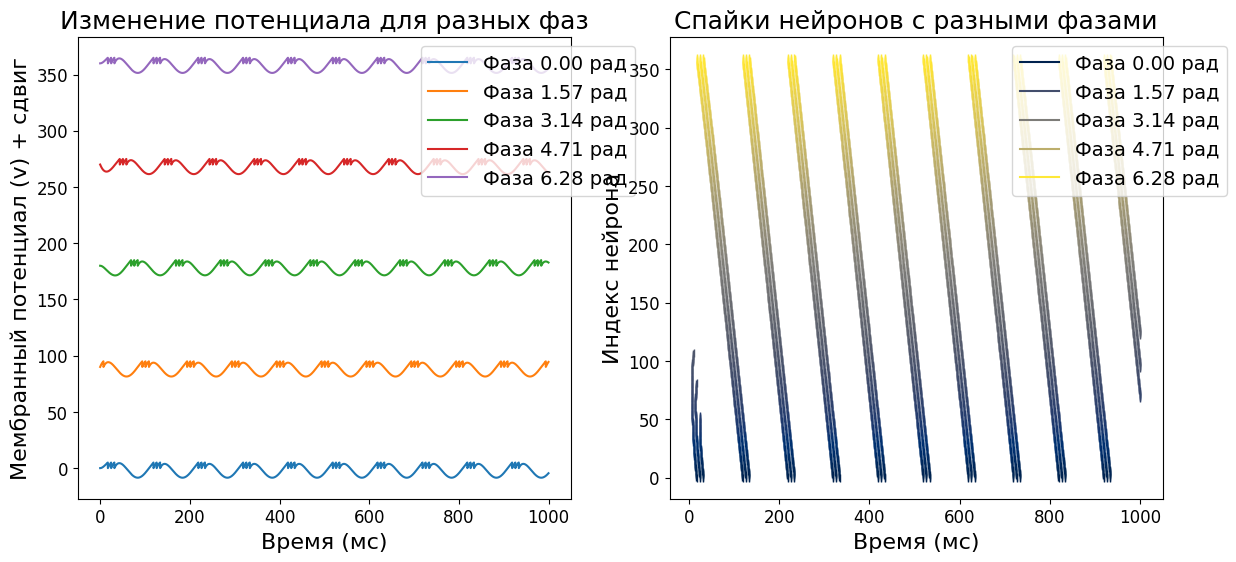

In [3]:
# --- Фигура 2: Результаты для нейронов с разными фазами ---
plt.figure(figsize=(14, 6))
amplitude_scale = 10  # Коэффициент масштабирования

# График 1: Мембранный потенциал для нейронов с разными фазами (с добавленным сдвигом)
plt.subplot(121)
for i in range(0, 361, 90):  # Выводим потенциалы для каждых 90-го нейрона
    plot(voltage_monitor_phase.t / ms, amplitude_scale * voltage_monitor_phase.v[i] + i * offset, label=f'Фаза {phases[i]:.2f} рад')
plt.xlabel('Время (мс)')
plt.ylabel('Мембранный потенциал (v) + сдвиг')
plt.title('Изменение потенциала для разных фаз')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# График 2: Спайки нейронов с разными фазами
plt.subplot(122)
for i in range(361):
    neuron_spikes = spike_monitor_phase.i == i
    plot(spike_monitor_phase.t[neuron_spikes] / ms, spike_monitor_phase.i[neuron_spikes], '|', 
         color=plt.cm.cividis(phases[i] / (2 * pi)))

plt.xlabel('Время (мс)')
plt.ylabel('Индекс нейрона')
plt.title('Спайки нейронов с разными фазами')

# Создаем легенду с метками фаз от 0 до 2pi
custom_legend = [f'Фаза {phase:.2f} рад' for phase in np.linspace(0, 2 * pi, 5)]
colors_phase_legend = plt.cm.cividis(np.linspace(0, 1, 5))

# Добавляем пользовательскую легенду
for i, label in enumerate(custom_legend):
    plt.plot([], [], color=colors_phase_legend[i], label=label)

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))